In [1]:
#import useful libraries for analysis and modeling
import pandas as pd
import numpy as np
from sklearn import tree
from scipy import stats
import os
import pickle
import sys
import tempfile
# import matplotlib as mpl
# import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.tree import export_graphviz, DecisionTreeClassifier
pd.options.mode.chained_assignment = None
from IPython.display import display, HTML
import warnings

# Filter all warnings
warnings.filterwarnings("ignore")

In [2]:
from matplotlib import cm  # color map
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
def plot_3d_tri_surface(params_1, params_2, z, indices_1, indices_2, y_title, x_title, z_title, is_z_lim, z_start, z_end, is_z_cm_lim, z_cm_start, z_cm_end, list_of_ticks, outfile, tree, depth, feats, max_score, max_param1, max_param2):
    
    # for i in range(0, len(params_2)):
    #     if params_2[i] >= 1:
    #         params_2[i] = int(params_2[i])
            
    fig = plt.figure(figsize = (8, 8))
    ax = fig.add_subplot(projection='3d', computed_zorder = False)
    # ax.computed_zorder = False
    ax.set_box_aspect(aspect=None, zoom=0.9)
    #
    cmap = cm.colors.LinearSegmentedColormap.from_list("", ["khaki", "darkgreen"])
    # cmap = cm.colors.LinearSegmentedColormap.from_list("", ["darkgreen", "khaki"])
    #
    ## To limit colorbar values
    if(is_z_cm_lim):
        surf_tri = ax.plot_trisurf(params_1, params_2, z, cmap=cmap, edgecolor='darkkhaki', linewidth=0.1, vmin = z_cm_start, vmax = z_cm_end, zorder=4.4)
        # ax.set_zlim(z_start, z_end)
    else:
        surf_tri = ax.plot_trisurf(params_1, params_2, z, cmap=cmap, edgecolor='darkkhaki', linewidth=0.1, zorder=4.4)

    ## Put a limit to z-axis
    if(is_z_lim):
        ax.set_zlim(z_start, z_end)
    
    # ax.view_init(120, 5)
    # ax.plot_surface
    # ax.set_yticks(indices_2)
    # ax.set_xticks(indices_1)
    
    # ax.set_yticklabels(params_1, weight='regular')
    # ax.set_xticklabels(params_2, rotation=18, weight='regular')
    # ax.set_zticklabels(ax.get_zticks(), fontsize=12)
    ax.tick_params(axis='both', labelsize=12)
    
    # Set axes label
    ax.set_xlabel(x_title, fontsize=15, labelpad=13)
    ax.set_ylabel(y_title, fontsize=15, labelpad=14)
    ax.set_zlabel(z_title, fontsize=15,  labelpad=9)
    ax.set_title('Depth: '+str(depth), fontsize=15)
    ax.zaxis.set_major_locator(plt.MaxNLocator(6))
    # ax.tick_params(direction='out', length=6, width=2, grid_alpha=0.5, color='black')

    c_bar = fig.colorbar(surf_tri, shrink=0.5, aspect=8) # format="%.2f"
    # c_bar.set_ticks(list_of_ticks)
    # c_bar.set_ticklabels(list_of_ticks, fontsize=15)
    ## Show the parameters we chose - Plot the single 3d point on the same axis
    ax.set_axisbelow(True)
    ax.scatter(max_param1, max_param2, max_score, c='#EE4B2B', alpha=1, edgecolors='none', s=200, zorder=5.5)
    ax.plot(indices_1, [tree]*len(indices_1), [max(z)]*len(indices_1), c='#EE4B2B', alpha=1,  zorder=5.5, linewidth=3)
    ax.plot([feats]*len(indices_2), indices_2, [max(z)]*len(indices_2), c='#EE4B2B', alpha=1,  zorder=5.5, linewidth=3)
    
    # plt.savefig(outfile, dpi=200, bbox_inches='tight', pad_inches=0.1)
    # Showing the above plot
    plt.show()

In [3]:
def plot_line(x_axis_values, y_axis_values, labels, x_title, y_title, fig_title):
    
# solution_colors = {'Soter': '#6E7E99','Mousika': '#ffbb78', 'Planter': 'teal', 'pForest': '#8A9961', 
                    #    'NetBeacon': '#1f77b4', 'Flowrest': '#E06B5A', 'Jewel': '#A95C68'}
    fig = plt.figure(figsize = (5, 5))
    colors= {'#6E7E99', '#ffbb78','#8A9961','#1f77b4', '#E06B5A', '#A95C68'}
    for x_axis_val, y_axis_val, label, color in zip(x_axis_values, y_axis_values, labels, colors):
        plt.plot(x_axis_val, y_axis_val, label=label, color=color, linewidth=1.5)
    
    plt.xlabel(x_title, fontsize=15, labelpad=13)
    plt.ylabel(y_title, fontsize=15, labelpad=14)
    plt.title(fig_title)
    plt.legend()
    plt.show()

In [4]:
# !pip install matplotlib

In [5]:
def get_mean(row, column_name):
    return np.mean(row[column_name].to_list())

In [6]:
def read_csvs(npkts):
    filename = "/home/nds-admin/UNSW_PCAPS/hyb_code/with_FL_Metric/model_analysis_results/unsw_models_" + str(npkts) + "pkts_FEATSALL_FL.csv"
    model_analysis_df = pd.read_csv(filename, sep=';')
    return model_analysis_df

## N=3

In [22]:
model_analysis_n_3 = read_csvs(npkts=3)

In [23]:
model_analysis_n_3['Weighted_f1_FL'] = model_analysis_n_3['Weighted_f1_FL']*100
model_analysis_n_3['Macro_f1_FL']   = model_analysis_n_3['Macro_f1_FL']*100
model_analysis_n_3['Micro_f1_FL']   = model_analysis_n_3['Micro_f1_FL']*100
model_analysis_n_3['Macro_F1_PL']   = model_analysis_n_3['Macro_F1_PL']*100
model_analysis_n_3['Weighted_F1_PL'] = model_analysis_n_3['Weighted_F1_PL']*100

In [24]:
### Grouped by [tree, no_feats]
# weightedFL_2k_grouped_by_TREE = weightedFL_2k.groupby(['tree', 'no_feats']).agg(list)

### Grouped by [tree + no_feats]
# weightedFL_2k_grouped = weightedFL_2k.groupby(['tree_feats']).agg(list)

### Depth: 5

In [25]:
### Filter all the results
model_analysis_n_3_D10 = model_analysis_n_3[model_analysis_n_3['depth'] == 10]

In [26]:
# weightedFL_2k = model_analysis_n_3.sort_values(by='Weighted_f1_FL', ascending=False).head(5000)
# weightedFL_2k = weightedFL_2k[['depth', 'tree', 'no_feats', 'Macro_f1_FL', 'Weighted_f1_FL', 'Micro_f1_FL', 'Macro_F1_PL', 'Weighted_F1_PL']]
# weightedFL_2k['tree_feats'] = weightedFL_2k['tree'] + weightedFL_2k['no_feats']

In [27]:
# weightedFL_2k_grouped['Average_Macro_FL'] = weightedFL_2k_grouped.apply(lambda row: np.mean(row['Macro_f1_FL']), axis=1)
# weightedFL_2k_grouped['Average_Weighted_FL'] = weightedFL_2k_grouped.apply(lambda row: np.mean(row['Weighted_f1_FL']), axis=1)
# weightedFL_2k_grouped['Average_Micro_FL'] = weightedFL_2k_grouped.apply(lambda row: np.mean(row['Micro_f1_FL']), axis=1)
# weightedFL_2k_grouped['Average_Weighted_PL'] = weightedFL_2k_grouped.apply(lambda row: np.mean(row['Weighted_F1_PL']), axis=1)
# weightedFL_2k_grouped['Average_Macro_PL'] = weightedFL_2k_grouped.apply(lambda row: np.mean(row['Macro_F1_PL']), axis=1)

In [28]:
model_analysis_n_3_D10 = model_analysis_n_3_D10[['depth', 'tree', 'no_feats', 'Macro_f1_FL', 'Weighted_f1_FL', 'Micro_f1_FL', 'Macro_F1_PL', 'Weighted_F1_PL']]

In [29]:
trees           = model_analysis_n_3_D10['tree'].to_list()
no_feats        = model_analysis_n_3_D10['no_feats'].to_list()
Weighted_f1_FL  = model_analysis_n_3_D10['Weighted_f1_FL'].to_list()
Macro_f1_FL     = model_analysis_n_3_D10['Macro_f1_FL'].to_list()
Micro_f1_FL     = model_analysis_n_3_D10['Micro_f1_FL'].to_list()
Macro_F1_PL     = model_analysis_n_3_D10['Macro_F1_PL'].to_list()
Weighted_F1_PL  = model_analysis_n_3_D10['Weighted_F1_PL'].to_list()

In [30]:
model_analysis_n_3_D10.sort_values(by='Weighted_f1_FL', ascending=False).head(5)

depth  tree  no_feats  Macro_f1_FL  Weighted_f1_FL  Micro_f1_FL  \
21923     10    28         7    67.080104       82.874147    83.025976   
18699     10    24         7    67.489423       82.835554    82.877130   
17087     10    22         7    67.213636       82.684006    82.761124   
17893     10    23         7    67.350545       82.674195    82.706628   
12251     10    16         7    66.739458       82.656155    83.100175   

       Macro_F1_PL  Weighted_F1_PL  
21923    65.670044       69.933200  
18699    66.554564       71.723840  
17087    66.532906       71.783328  
17893    67.383585       72.331129  
12251    68.575679       73.076276

In [31]:
max_score   = model_analysis_n_3_D10.sort_values(by='Weighted_f1_FL', ascending=False).head(1)['Weighted_f1_FL'].to_list()[0]
max_feats   = model_analysis_n_3_D10.sort_values(by='Weighted_f1_FL', ascending=False).head(1)['no_feats'].to_list()[0]
max_tree    = model_analysis_n_3_D10.sort_values(by='Weighted_f1_FL', ascending=False).head(1)['tree'].to_list()[0]

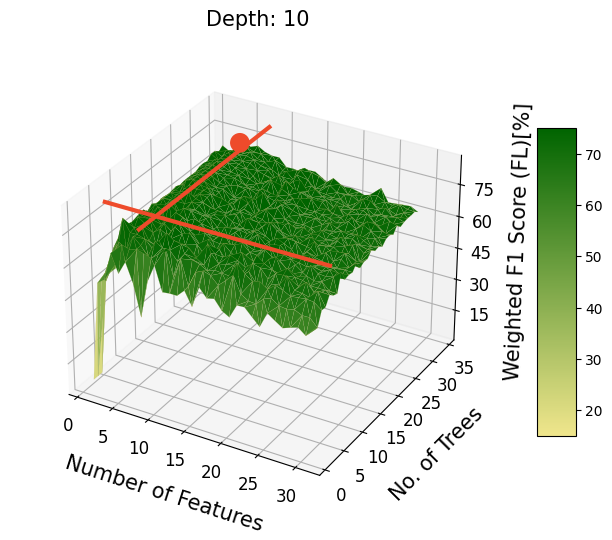

In [32]:
plot_3d_tri_surface(no_feats, trees, Weighted_f1_FL, list(range(1, 32, 1)), list(range(1, 35, 1)), 'No. of Trees', 'Number of Features', 'Weighted F1 Score (FL)[%]', 0, 10, 80, 1, 15, 75, [10.0, 25.0, 40.0, 55.0, 70.00, 85.0], '', tree=5, depth=10, feats=8, max_score=max_score, max_param1=max_feats, max_param2=max_tree)

In [33]:
max_score   = model_analysis_n_3_D10.sort_values(by='Macro_f1_FL', ascending=False).head(1)['Macro_f1_FL'].to_list()[0]
max_feats   = model_analysis_n_3_D10.sort_values(by='Macro_f1_FL', ascending=False).head(1)['no_feats'].to_list()[0]
max_tree    = model_analysis_n_3_D10.sort_values(by='Macro_f1_FL', ascending=False).head(1)['tree'].to_list()[0]

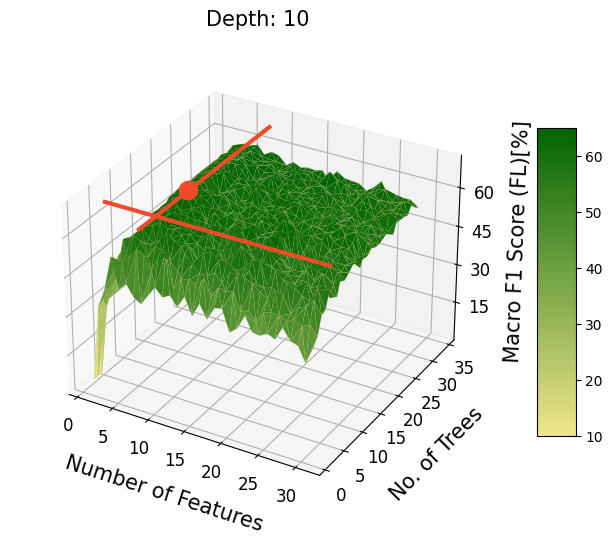

In [34]:
plot_3d_tri_surface(no_feats, trees, Macro_f1_FL, list(range(1, 32, 1)), list(range(1, 35, 1)), 'No. of Trees', 'Number of Features', 'Macro F1 Score (FL)[%]', 0, 10, 80, 1, 10, 65, [10.0, 25.0, 40.0, 55.0, 70.00, 85.0], '', tree=5, depth=10, feats=8, max_score=max_score, max_param1=max_feats, max_param2=max_tree)

In [35]:
max_score   = model_analysis_n_3_D10.sort_values(by='Macro_F1_PL', ascending=False).head(1)['Macro_F1_PL'].to_list()[0]
max_feats   = model_analysis_n_3_D10.sort_values(by='Macro_F1_PL', ascending=False).head(1)['no_feats'].to_list()[0]
max_tree    = model_analysis_n_3_D10.sort_values(by='Macro_F1_PL', ascending=False).head(1)['tree'].to_list()[0]

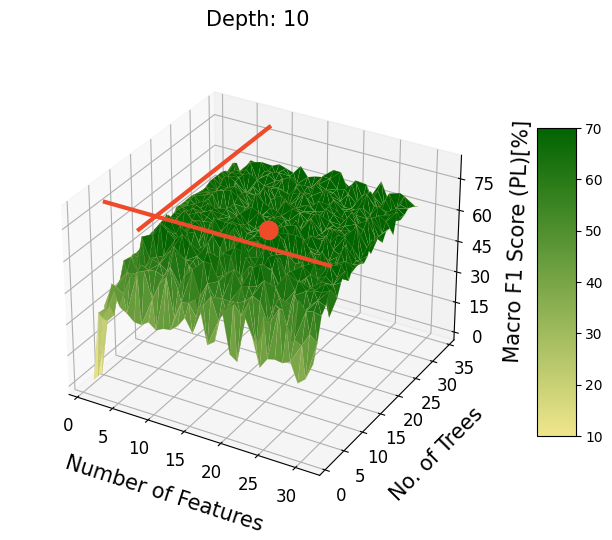

In [36]:
plot_3d_tri_surface(no_feats, trees, Macro_F1_PL, list(range(1, 32, 1)), list(range(1, 35, 1)), 'No. of Trees', 'Number of Features', 'Macro F1 Score (PL)[%]', 0, 10, 80, 1, 10, 70, [10.0, 25.0, 40.0, 55.0, 70.00, 85.0], '', tree=5, depth=10, feats=8, max_score=max_score, max_param1=max_feats, max_param2=max_tree)

In [37]:
max_score   = model_analysis_n_3_D10.sort_values(by='Weighted_F1_PL', ascending=False).head(1)['Weighted_F1_PL'].to_list()[0]
max_feats   = model_analysis_n_3_D10.sort_values(by='Weighted_F1_PL', ascending=False).head(1)['no_feats'].to_list()[0]
max_tree    = model_analysis_n_3_D10.sort_values(by='Weighted_F1_PL', ascending=False).head(1)['tree'].to_list()[0]

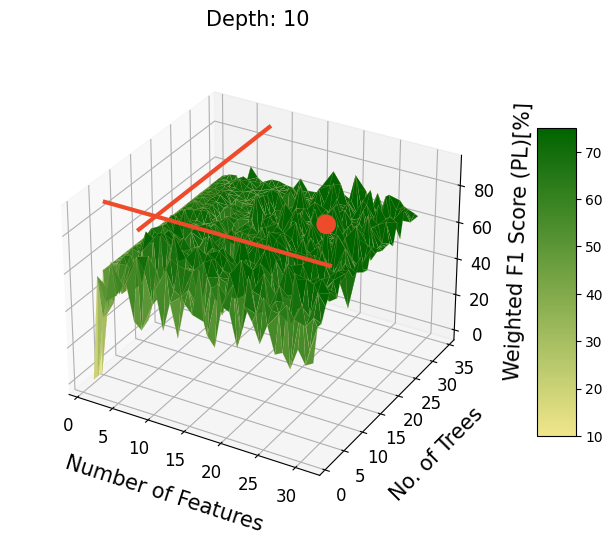

In [38]:
plot_3d_tri_surface(no_feats, trees, Weighted_F1_PL, list(range(1, 32, 1)), list(range(1, 35, 1)), 'No. of Trees', 'Number of Features', 'Weighted F1 Score (PL)[%]', 0, 10, 80, 1, 10, 75, [10.0, 25.0, 40.0, 55.0, 70.00, 85.0], '', tree=5, depth=10, feats=8, max_score=max_score, max_param1=max_feats, max_param2=max_tree)

#### DEPTH 20

In [39]:
### Filter all the results
model_analysis_n_3_D20 = model_analysis_n_3[model_analysis_n_3['depth'] == 20]

In [40]:
model_analysis_n_3_D20.sort_values(by='Weighted_f1_FL', ascending=False).head(2)

depth  tree  no_feats  N_Leaves  Macro_f1_FL  Weighted_f1_FL  \
13369     20    17         9       500    74.823281       89.123348   
13367     20    17         7       500    75.138667       89.086278   

       Micro_f1_FL                                              feats  \
13369    89.190965  ['tcp.window_size_value', 'ip.len', 'srcport',...   
13367    89.052882  ['tcp.window_size_value', 'ip.len', 'srcport',...   

       pkt_macro_f1  pkt_weighted_f1  flw_macro_f1  flw_weighted_f1  F1_macro  \
13369      0.691411         0.861651      0.818793         0.939871  0.726128   
13367      0.699265         0.864364      0.832516         0.938737  0.734287   

       F1_weighted  num_samples  Macro_F1_PL  Weighted_F1_PL  
13369     0.883148      1488248    81.521065       92.377061  
13367     0.885039      1488248    78.930189       85.889445

In [41]:
trees           = model_analysis_n_3_D20['tree'].to_list()
no_feats        = model_analysis_n_3_D20['no_feats'].to_list()
Weighted_f1_FL  = model_analysis_n_3_D20['Weighted_f1_FL'].to_list()
Macro_f1_FL     = model_analysis_n_3_D20['Macro_f1_FL'].to_list()
Micro_f1_FL     = model_analysis_n_3_D20['Micro_f1_FL'].to_list()
Macro_F1_PL     = model_analysis_n_3_D20['Macro_F1_PL'].to_list()
Weighted_F1_PL  = model_analysis_n_3_D20['Weighted_F1_PL'].to_list()

In [42]:
# max_weighted_FL = model_analysis_n_3_D20.sort_values(by='Weighted_f1_FL', ascending=False).head(1)['tree'].to_list()[0]
# max_macro_FL = model_analysis_n_3_D20.sort_values(by='Macro_f1_FL', ascending=False).head(1)['tree'].to_list()[0]
# max_weighted_PL = model_analysis_n_3_D20.sort_values(by='Weighted_F1_PL', ascending=False).head(1)['tree'].to_list()[0]
# max_macro_PL = model_analysis_n_3_D20.sort_values(by='Macro_F1_PL', ascending=False).head(1)['tree'].to_list()[0]

# max_weighted_FL = model_analysis_n_3_D20.sort_values(by='Weighted_f1_FL', ascending=False).head(1)['tree'].to_list()[0]
# max_macro_FL = model_analysis_n_3_D20.sort_values(by='Macro_f1_FL', ascending=False).head(1)['tree'].to_list()[0]

In [43]:
max_score   = model_analysis_n_3_D20.sort_values(by='Weighted_f1_FL', ascending=False).head(1)['Weighted_f1_FL'].to_list()[0]
max_feats   = model_analysis_n_3_D20.sort_values(by='Weighted_f1_FL', ascending=False).head(1)['no_feats'].to_list()[0]
max_tree    = model_analysis_n_3_D20.sort_values(by='Weighted_f1_FL', ascending=False).head(1)['tree'].to_list()[0]

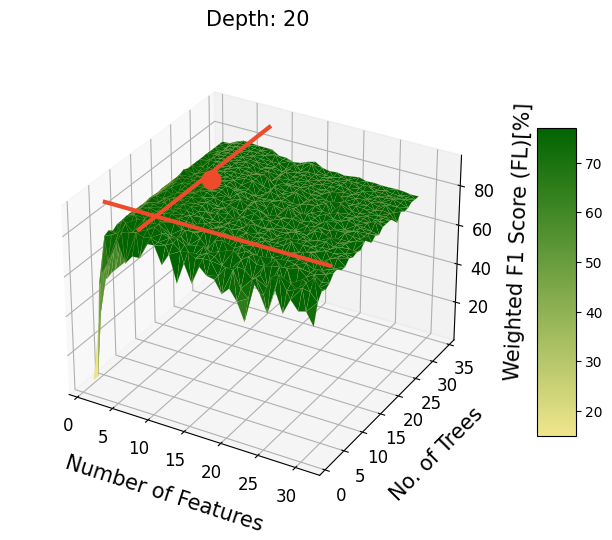

In [44]:
plot_3d_tri_surface(no_feats, trees, Weighted_f1_FL, list(range(1, 32, 1)), list(range(1, 35, 1)), 'No. of Trees', 'Number of Features', 'Weighted F1 Score (FL)[%]', 0, 10, 80, 1, 15, 77, [10.0, 25.0, 40.0, 55.0, 70.00, 85.0], '', tree=5, depth=20, feats=8, max_score=max_score, max_param1=max_feats, max_param2=max_tree)

In [45]:
max_score   = model_analysis_n_3_D20.sort_values(by='Macro_f1_FL', ascending=False).head(1)['Macro_f1_FL'].to_list()[0]
max_feats   = model_analysis_n_3_D20.sort_values(by='Macro_f1_FL', ascending=False).head(1)['no_feats'].to_list()[0]
max_tree    = model_analysis_n_3_D20.sort_values(by='Macro_f1_FL', ascending=False).head(1)['tree'].to_list()[0]

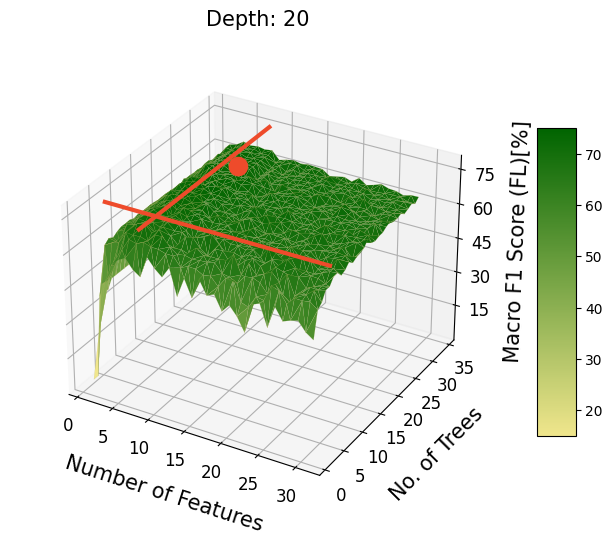

In [46]:
plot_3d_tri_surface(no_feats, trees, Macro_f1_FL, list(range(1, 32, 1)), list(range(1, 35, 1)), 'No. of Trees', 'Number of Features', 'Macro F1 Score (FL)[%]', 0, 10, 80, 1, 15, 75, [10.0, 25.0, 40.0, 55.0, 70.00, 85.0], '', tree=5, depth=20, feats=8, max_score=max_score, max_param1=max_feats, max_param2=max_tree)

In [47]:
max_score   = model_analysis_n_3_D20.sort_values(by='Weighted_F1_PL', ascending=False).head(1)['Weighted_F1_PL'].to_list()[0]
max_feats   = model_analysis_n_3_D20.sort_values(by='Weighted_F1_PL', ascending=False).head(1)['no_feats'].to_list()[0]
max_tree    = model_analysis_n_3_D20.sort_values(by='Weighted_F1_PL', ascending=False).head(1)['tree'].to_list()[0]

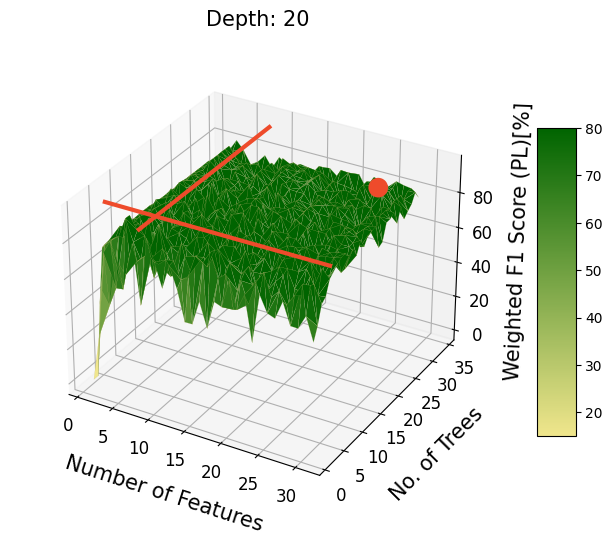

In [48]:
plot_3d_tri_surface(no_feats, trees, Weighted_F1_PL, list(range(1, 32, 1)), list(range(1, 35, 1)), 'No. of Trees', 'Number of Features', 'Weighted F1 Score (PL)[%]', 0, 10, 80, 1, 15, 80, [10.0, 25.0, 40.0, 55.0, 70.00, 85.0], '', tree=5, depth=20, feats=8, max_score=max_score, max_param1=max_feats, max_param2=max_tree)

In [49]:
max_score   = model_analysis_n_3_D20.sort_values(by='Macro_F1_PL', ascending=False).head(1)['Macro_F1_PL'].to_list()[0]
max_feats   = model_analysis_n_3_D20.sort_values(by='Macro_F1_PL', ascending=False).head(1)['no_feats'].to_list()[0]
max_tree    = model_analysis_n_3_D20.sort_values(by='Macro_F1_PL', ascending=False).head(1)['tree'].to_list()[0]

In [50]:
model_analysis_n_3_D20.sort_values(by='Macro_F1_PL', ascending=False).head(1)

depth  tree  no_feats  N_Leaves  Macro_f1_FL  Weighted_f1_FL  \
15002     20    19        30       500     72.52342       86.443422   

       Micro_f1_FL                                              feats  \
15002    86.956902  ['tcp.window_size_value', 'ip.len', 'srcport',...   

       pkt_macro_f1  pkt_weighted_f1  flw_macro_f1  flw_weighted_f1  F1_macro  \
15002      0.575297         0.795356      0.855333         0.941278  0.661053   

       F1_weighted  num_samples  Macro_F1_PL  Weighted_F1_PL  
15002     0.834616      1488248    84.112175       93.985079

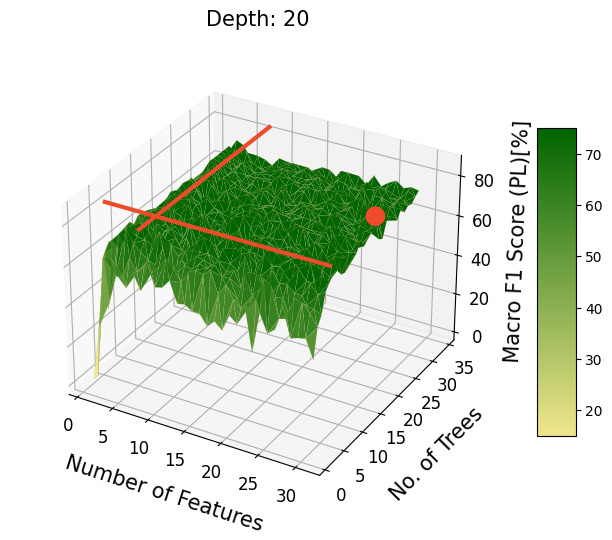

In [51]:
plot_3d_tri_surface(no_feats, trees, Macro_F1_PL, list(range(1, 32, 1)), list(range(1, 35, 1)), 'No. of Trees', 'Number of Features', 'Macro F1 Score (PL)[%]', 0, 10, 80, 1, 15, 75, [10.0, 25.0, 40.0, 55.0, 70.00, 85.0], '', tree=5, depth=20, feats=8, max_score=max_score, max_param1=max_feats, max_param2=max_tree)

#### Depth = 30

In [52]:
### Filter all the results
model_analysis_n_3_D30 = model_analysis_n_3[model_analysis_n_3['depth'] == 30]

In [53]:
trees           = model_analysis_n_3_D30['tree'].to_list()
no_feats        = model_analysis_n_3_D30['no_feats'].to_list()
Weighted_f1_FL  = model_analysis_n_3_D30['Weighted_f1_FL'].to_list()
Macro_f1_FL     = model_analysis_n_3_D30['Macro_f1_FL'].to_list()
Micro_f1_FL     = model_analysis_n_3_D30['Micro_f1_FL'].to_list()
Macro_F1_PL     = model_analysis_n_3_D30['Macro_F1_PL'].to_list()
Weighted_F1_PL  = model_analysis_n_3_D30['Weighted_F1_PL'].to_list()

In [54]:
max_score   = model_analysis_n_3_D30.sort_values(by='Weighted_f1_FL', ascending=False).head(1)['Weighted_f1_FL'].to_list()[0]
max_feats   = model_analysis_n_3_D30.sort_values(by='Weighted_f1_FL', ascending=False).head(1)['no_feats'].to_list()[0]
max_tree    = model_analysis_n_3_D30.sort_values(by='Weighted_f1_FL', ascending=False).head(1)['tree'].to_list()[0]

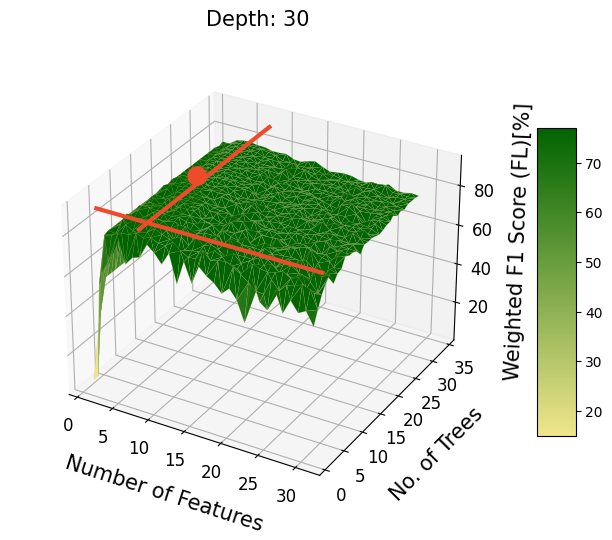

In [55]:
plot_3d_tri_surface(no_feats, trees, Weighted_f1_FL, list(range(1, 32, 1)), list(range(1, 35, 1)), 'No. of Trees', 'Number of Features', 'Weighted F1 Score (FL)[%]', 0, 10, 80, 1, 15, 77, [10.0, 25.0, 40.0, 55.0, 70.00, 85.0], '', tree=3, depth=30, feats=8,max_score=max_score, max_param1=max_feats, max_param2=max_tree)

In [56]:
max_score   = model_analysis_n_3_D30.sort_values(by='Macro_f1_FL', ascending=False).head(1)['Macro_f1_FL'].to_list()[0]
max_feats   = model_analysis_n_3_D30.sort_values(by='Macro_f1_FL', ascending=False).head(1)['no_feats'].to_list()[0]
max_tree    = model_analysis_n_3_D30.sort_values(by='Macro_f1_FL', ascending=False).head(1)['tree'].to_list()[0]

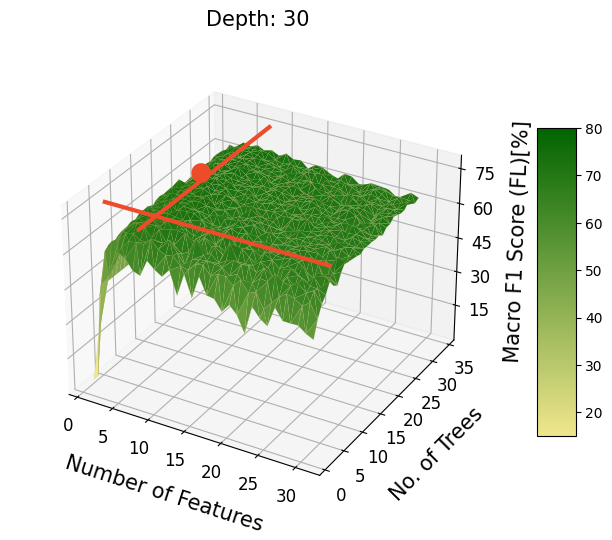

In [57]:
plot_3d_tri_surface(no_feats, trees, Macro_f1_FL, list(range(1, 32, 1)), list(range(1, 35, 1)), 'No. of Trees', 'Number of Features', 'Macro F1 Score (FL)[%]', 0, 10, 80, 1, 15, 80, [10.0, 25.0, 40.0, 55.0, 70.00, 85.0], '', tree=5, depth=30, feats=8, max_score=max_score, max_param1=max_feats, max_param2=max_tree)

In [58]:
max_score   = model_analysis_n_3_D30.sort_values(by='Weighted_F1_PL', ascending=False).head(1)['Weighted_F1_PL'].to_list()[0]
max_feats   = model_analysis_n_3_D30.sort_values(by='Weighted_F1_PL', ascending=False).head(1)['no_feats'].to_list()[0]
max_tree    = model_analysis_n_3_D30.sort_values(by='Weighted_F1_PL', ascending=False).head(1)['tree'].to_list()[0]

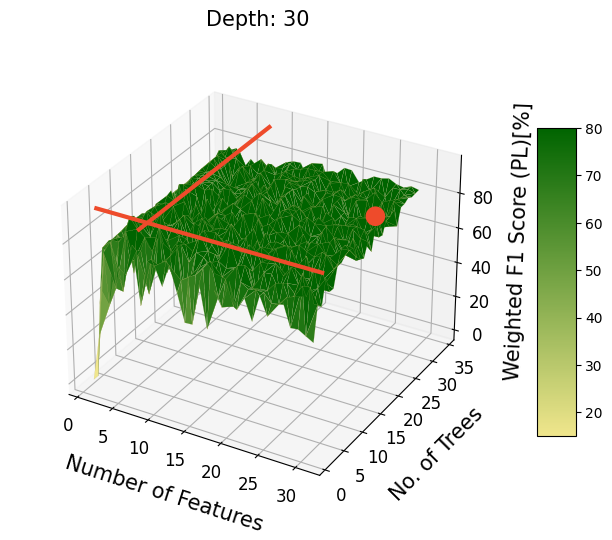

In [59]:
plot_3d_tri_surface(no_feats, trees, Weighted_F1_PL, list(range(1, 32, 1)), list(range(1, 35, 1)), 'No. of Trees', 'Number of Features', 'Weighted F1 Score (PL)[%]', 0, 10, 80, 1, 15, 80, [10.0, 25.0, 40.0, 55.0, 70.00, 85.0], '', tree=3, depth=30, feats=8, max_score=max_score, max_param1=max_feats, max_param2=max_tree)

In [60]:
max_score   = model_analysis_n_3_D30.sort_values(by='Macro_F1_PL', ascending=False).head(1)['Macro_F1_PL'].to_list()[0]
max_feats   = model_analysis_n_3_D30.sort_values(by='Macro_F1_PL', ascending=False).head(1)['no_feats'].to_list()[0]
max_tree    = model_analysis_n_3_D30.sort_values(by='Macro_F1_PL', ascending=False).head(1)['tree'].to_list()[0]

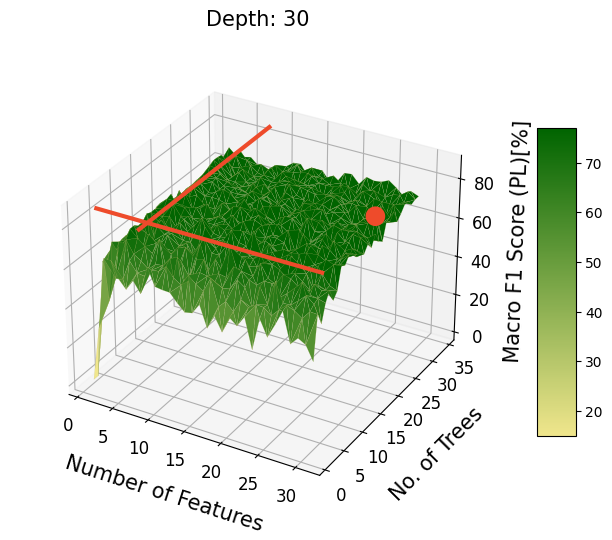

In [61]:
plot_3d_tri_surface(no_feats, trees, Macro_F1_PL, list(range(1, 32, 1)), list(range(1, 35, 1)), 'No. of Trees', 'Number of Features', 'Macro F1 Score (PL)[%]', 0, 10, 80, 1, 15, 77, [10.0, 25.0, 40.0, 55.0, 70.00, 85.0], '', tree=3, depth=30, feats=8, max_score=max_score, max_param1=max_feats, max_param2=max_tree)

In [62]:
# weightedFL_2k_grouped_by_TREE.sort_values(by='Average_Weighted_PL', ascending=False).tail(5)

#### 2D PLOTS

#### Depth = 10

In [63]:
model_analysis_n_3_D10_T1 = model_analysis_n_3[(model_analysis_n_3['depth'] == 10) & (model_analysis_n_3['tree'] == 1)]
model_analysis_n_3_D10_T3 = model_analysis_n_3[(model_analysis_n_3['depth'] == 10) & (model_analysis_n_3['tree'] == 3)]
model_analysis_n_3_D10_T5 = model_analysis_n_3[(model_analysis_n_3['depth'] == 10) & (model_analysis_n_3['tree'] == 5)]
model_analysis_n_3_D10_T10 = model_analysis_n_3[(model_analysis_n_3['depth'] == 10) & (model_analysis_n_3['tree'] == 10)]
model_analysis_n_3_D10_T20 = model_analysis_n_3[(model_analysis_n_3['depth'] == 10) & (model_analysis_n_3['tree'] == 20)]
model_analysis_n_3_D10_T30 = model_analysis_n_3[(model_analysis_n_3['depth'] == 10) & (model_analysis_n_3['tree'] == 30)]

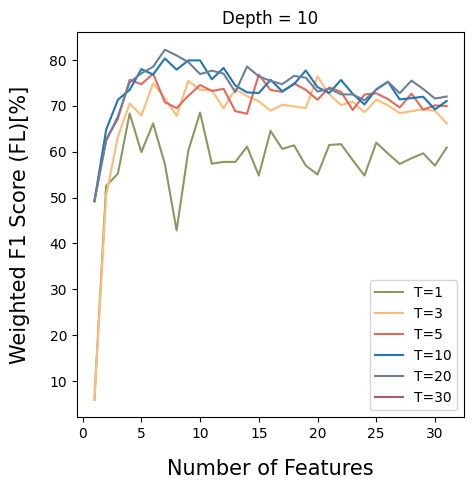

In [64]:
plot_line([model_analysis_n_3_D10_T1['no_feats'].to_list(), model_analysis_n_3_D10_T3['no_feats'].to_list(), model_analysis_n_3_D10_T5['no_feats'].to_list(), model_analysis_n_3_D10_T10['no_feats'].to_list(),  model_analysis_n_3_D10_T20['no_feats'].to_list(), model_analysis_n_3_D10_T30['no_feats'].to_list()], 
          [model_analysis_n_3_D10_T1['Weighted_f1_FL'].to_list(), model_analysis_n_3_D10_T3['Weighted_f1_FL'].to_list(), model_analysis_n_3_D10_T5['Weighted_f1_FL'].to_list(), model_analysis_n_3_D10_T10['Weighted_f1_FL'].to_list(), model_analysis_n_3_D10_T20['Weighted_f1_FL'].to_list(), model_analysis_n_3_D10_T30['Weighted_f1_FL'].to_list()],
          ['T=1', 'T=3', 'T=5', 'T=10', 'T=20', 'T=30'], 'Number of Features', 'Weighted F1 Score (FL)[%]', 'Depth = 10')

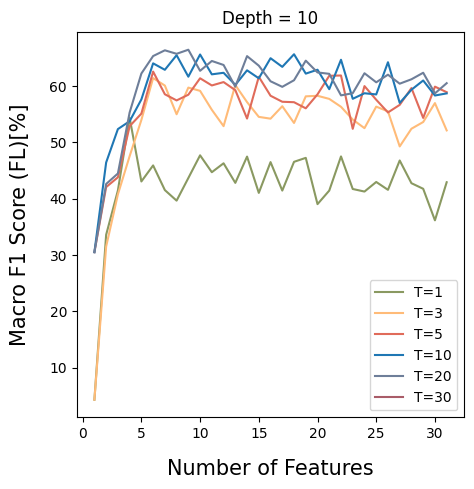

In [65]:
plot_line([model_analysis_n_3_D10_T1['no_feats'].to_list(), model_analysis_n_3_D10_T3['no_feats'].to_list(), model_analysis_n_3_D10_T5['no_feats'].to_list(), model_analysis_n_3_D10_T10['no_feats'].to_list(),  model_analysis_n_3_D10_T20['no_feats'].to_list(), model_analysis_n_3_D10_T30['no_feats'].to_list()], 
          [model_analysis_n_3_D10_T1['Macro_f1_FL'].to_list(), model_analysis_n_3_D10_T3['Macro_f1_FL'].to_list(), model_analysis_n_3_D10_T5['Macro_f1_FL'].to_list(), model_analysis_n_3_D10_T10['Macro_f1_FL'].to_list(), model_analysis_n_3_D10_T20['Macro_f1_FL'].to_list(), model_analysis_n_3_D10_T30['Macro_f1_FL'].to_list()],
          ['T=1', 'T=3', 'T=5', 'T=10', 'T=20', 'T=30'], 'Number of Features', 'Macro F1 Score (FL)[%]', 'Depth = 10')

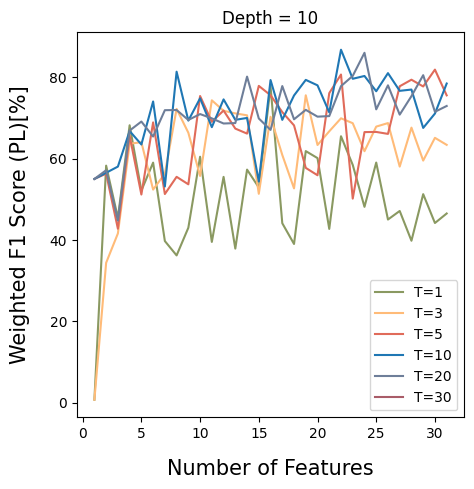

In [66]:
plot_line([model_analysis_n_3_D10_T1['no_feats'].to_list(), model_analysis_n_3_D10_T3['no_feats'].to_list(), model_analysis_n_3_D10_T5['no_feats'].to_list(), model_analysis_n_3_D10_T10['no_feats'].to_list(),  model_analysis_n_3_D10_T20['no_feats'].to_list(), model_analysis_n_3_D10_T30['no_feats'].to_list()], 
          [model_analysis_n_3_D10_T1['Weighted_F1_PL'].to_list(), model_analysis_n_3_D10_T3['Weighted_F1_PL'].to_list(), model_analysis_n_3_D10_T5['Weighted_F1_PL'].to_list(), model_analysis_n_3_D10_T10['Weighted_F1_PL'].to_list(), model_analysis_n_3_D10_T20['Weighted_F1_PL'].to_list(), model_analysis_n_3_D10_T30['Weighted_F1_PL'].to_list()],
          ['T=1', 'T=3', 'T=5', 'T=10', 'T=20', 'T=30'], 'Number of Features', 'Weighted F1 Score (PL)[%]', 'Depth = 10')

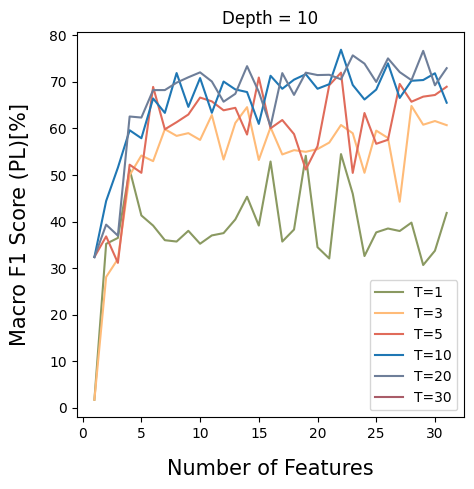

In [67]:
plot_line([model_analysis_n_3_D10_T1['no_feats'].to_list(), model_analysis_n_3_D10_T3['no_feats'].to_list(), model_analysis_n_3_D10_T5['no_feats'].to_list(), model_analysis_n_3_D10_T10['no_feats'].to_list(),  model_analysis_n_3_D10_T20['no_feats'].to_list(), model_analysis_n_3_D10_T30['no_feats'].to_list()], 
          [model_analysis_n_3_D10_T1['Macro_F1_PL'].to_list(), model_analysis_n_3_D10_T3['Macro_F1_PL'].to_list(), model_analysis_n_3_D10_T5['Macro_F1_PL'].to_list(), model_analysis_n_3_D10_T10['Macro_F1_PL'].to_list(), model_analysis_n_3_D10_T20['Macro_F1_PL'].to_list(), model_analysis_n_3_D10_T30['Macro_F1_PL'].to_list()],
          ['T=1', 'T=3', 'T=5', 'T=10', 'T=20', 'T=30'], 'Number of Features', 'Macro F1 Score (PL)[%]', 'Depth = 10')

#### Depth = 20

In [68]:
# model_analysis_n_3_D20_T1 = model_analysis_n_3[(model_analysis_n_3['depth'] == 20) & (model_analysis_n_3['tree'] == 1)]
# model_analysis_n_3_D20_T3 = model_analysis_n_3[(model_analysis_n_3['depth'] == 20) & (model_analysis_n_3['tree'] == 3)]
# model_analysis_n_3_D20_T5 = model_analysis_n_3[(model_analysis_n_3['depth'] == 20) & (model_analysis_n_3['tree'] == 5)]
# model_analysis_n_3_D20_T7 = model_analysis_n_3[(model_analysis_n_3['depth'] == 20) & (model_analysis_n_3['tree'] == 7)]
model_analysis_n_3_D20_T1 = model_analysis_n_3[(model_analysis_n_3['depth'] == 10) & (model_analysis_n_3['tree'] == 1)]
model_analysis_n_3_D20_T3 = model_analysis_n_3[(model_analysis_n_3['depth'] == 10) & (model_analysis_n_3['tree'] == 3)]
model_analysis_n_3_D20_T5 = model_analysis_n_3[(model_analysis_n_3['depth'] == 10) & (model_analysis_n_3['tree'] == 5)]
model_analysis_n_3_D20_T10 = model_analysis_n_3[(model_analysis_n_3['depth'] == 10) & (model_analysis_n_3['tree'] == 10)]
model_analysis_n_3_D20_T20 = model_analysis_n_3[(model_analysis_n_3['depth'] == 10) & (model_analysis_n_3['tree'] == 20)]
model_analysis_n_3_D20_T30 = model_analysis_n_3[(model_analysis_n_3['depth'] == 10) & (model_analysis_n_3['tree'] == 30)]

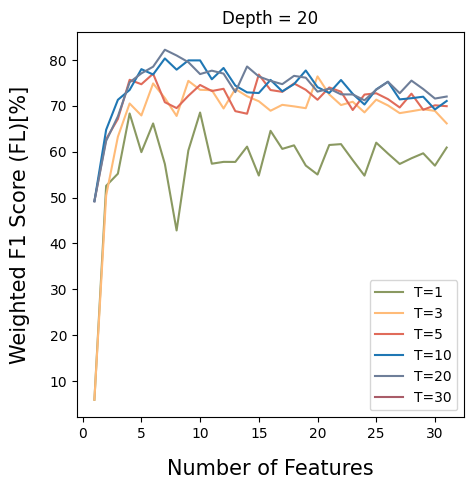

In [69]:
plot_line([model_analysis_n_3_D20_T1['no_feats'].to_list(), model_analysis_n_3_D20_T3['no_feats'].to_list(), model_analysis_n_3_D20_T5['no_feats'].to_list(), model_analysis_n_3_D20_T10['no_feats'].to_list(),  model_analysis_n_3_D20_T20['no_feats'].to_list(), model_analysis_n_3_D20_T30['no_feats'].to_list()], 
          [model_analysis_n_3_D20_T1['Weighted_f1_FL'].to_list(), model_analysis_n_3_D20_T3['Weighted_f1_FL'].to_list(), model_analysis_n_3_D20_T5['Weighted_f1_FL'].to_list(), model_analysis_n_3_D20_T10['Weighted_f1_FL'].to_list(), model_analysis_n_3_D20_T20['Weighted_f1_FL'].to_list(), model_analysis_n_3_D20_T30['Weighted_f1_FL'].to_list()],
          ['T=1', 'T=3', 'T=5', 'T=10', 'T=20', 'T=30'], 'Number of Features', 'Weighted F1 Score (FL)[%]', 'Depth = 20')

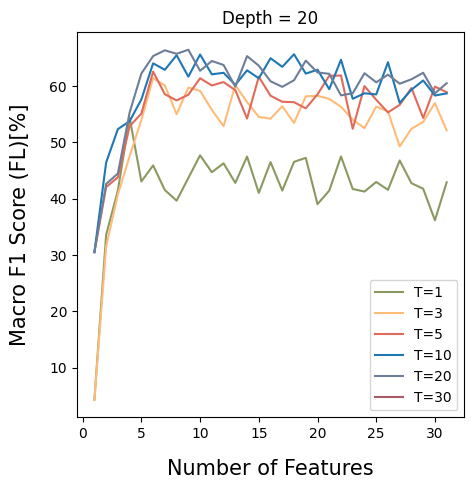

In [70]:
plot_line([model_analysis_n_3_D20_T1['no_feats'].to_list(), model_analysis_n_3_D20_T3['no_feats'].to_list(), model_analysis_n_3_D20_T5['no_feats'].to_list(), model_analysis_n_3_D20_T10['no_feats'].to_list(),  model_analysis_n_3_D20_T20['no_feats'].to_list(), model_analysis_n_3_D20_T30['no_feats'].to_list()], 
          [model_analysis_n_3_D20_T1['Macro_f1_FL'].to_list(), model_analysis_n_3_D20_T3['Macro_f1_FL'].to_list(), model_analysis_n_3_D20_T5['Macro_f1_FL'].to_list(), model_analysis_n_3_D20_T10['Macro_f1_FL'].to_list(), model_analysis_n_3_D20_T20['Macro_f1_FL'].to_list(), model_analysis_n_3_D20_T30['Macro_f1_FL'].to_list()],
          ['T=1', 'T=3', 'T=5', 'T=10', 'T=20', 'T=30'], 'Number of Features', 'Macro F1 Score (FL)[%]', 'Depth = 20')

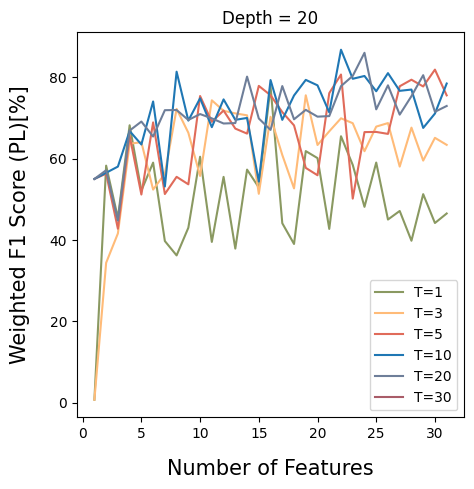

In [71]:
plot_line([model_analysis_n_3_D20_T1['no_feats'].to_list(), model_analysis_n_3_D20_T3['no_feats'].to_list(), model_analysis_n_3_D20_T5['no_feats'].to_list(), model_analysis_n_3_D20_T10['no_feats'].to_list(),  model_analysis_n_3_D20_T20['no_feats'].to_list(), model_analysis_n_3_D20_T30['no_feats'].to_list()], 
          [model_analysis_n_3_D20_T1['Weighted_F1_PL'].to_list(), model_analysis_n_3_D20_T3['Weighted_F1_PL'].to_list(), model_analysis_n_3_D20_T5['Weighted_F1_PL'].to_list(), model_analysis_n_3_D20_T10['Weighted_F1_PL'].to_list(), model_analysis_n_3_D20_T20['Weighted_F1_PL'].to_list(), model_analysis_n_3_D20_T30['Weighted_F1_PL'].to_list()],
          ['T=1', 'T=3', 'T=5', 'T=10', 'T=20', 'T=30'], 'Number of Features', 'Weighted F1 Score (PL)[%]', 'Depth = 20')

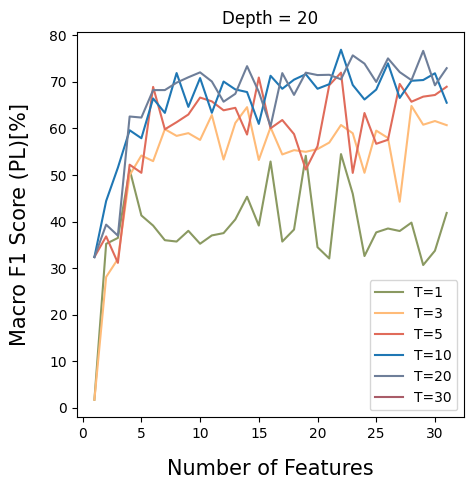

In [72]:
plot_line([model_analysis_n_3_D20_T1['no_feats'].to_list(), model_analysis_n_3_D20_T3['no_feats'].to_list(), model_analysis_n_3_D20_T5['no_feats'].to_list(), model_analysis_n_3_D20_T10['no_feats'].to_list(),  model_analysis_n_3_D20_T20['no_feats'].to_list(), model_analysis_n_3_D20_T30['no_feats'].to_list()], 
          [model_analysis_n_3_D20_T1['Macro_F1_PL'].to_list(), model_analysis_n_3_D20_T3['Macro_F1_PL'].to_list(), model_analysis_n_3_D20_T5['Macro_F1_PL'].to_list(), model_analysis_n_3_D20_T10['Macro_F1_PL'].to_list(), model_analysis_n_3_D20_T20['Macro_F1_PL'].to_list(), model_analysis_n_3_D20_T30['Macro_F1_PL'].to_list()],
          ['T=1', 'T=3', 'T=5', 'T=10', 'T=20', 'T=30'], 'Number of Features', 'Macro F1 Score (PL)[%]', 'Depth = 20')

#### Depth = 30

In [73]:
# model_analysis_n_3_D30_T1 = model_analysis_n_3[(model_analysis_n_3['depth'] == 30) & (model_analysis_n_3['tree'] == 1)]
# model_analysis_n_3_D30_T3 = model_analysis_n_3[(model_analysis_n_3['depth'] == 30) & (model_analysis_n_3['tree'] == 3)]
# model_analysis_n_3_D30_T5 = model_analysis_n_3[(model_analysis_n_3['depth'] == 30) & (model_analysis_n_3['tree'] == 5)]
# model_analysis_n_3_D30_T7 = model_analysis_n_3[(model_analysis_n_3['depth'] == 30) & (model_analysis_n_3['tree'] == 7)]
model_analysis_n_3_D30_T1 = model_analysis_n_3[(model_analysis_n_3['depth'] == 10) & (model_analysis_n_3['tree'] == 1)]
model_analysis_n_3_D30_T3 = model_analysis_n_3[(model_analysis_n_3['depth'] == 10) & (model_analysis_n_3['tree'] == 3)]
model_analysis_n_3_D30_T5 = model_analysis_n_3[(model_analysis_n_3['depth'] == 10) & (model_analysis_n_3['tree'] == 5)]
model_analysis_n_3_D30_T10 = model_analysis_n_3[(model_analysis_n_3['depth'] == 10) & (model_analysis_n_3['tree'] == 10)]
model_analysis_n_3_D30_T20 = model_analysis_n_3[(model_analysis_n_3['depth'] == 10) & (model_analysis_n_3['tree'] == 20)]
model_analysis_n_3_D30_T30 = model_analysis_n_3[(model_analysis_n_3['depth'] == 10) & (model_analysis_n_3['tree'] == 30)]

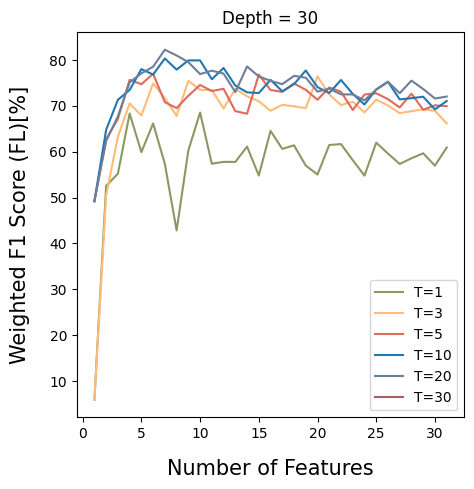

In [74]:
plot_line([model_analysis_n_3_D30_T1['no_feats'].to_list(), model_analysis_n_3_D30_T3['no_feats'].to_list(), model_analysis_n_3_D30_T5['no_feats'].to_list(), model_analysis_n_3_D30_T10['no_feats'].to_list(),  model_analysis_n_3_D30_T20['no_feats'].to_list(), model_analysis_n_3_D30_T30['no_feats'].to_list()], 
          [model_analysis_n_3_D30_T1['Weighted_f1_FL'].to_list(), model_analysis_n_3_D30_T3['Weighted_f1_FL'].to_list(), model_analysis_n_3_D30_T5['Weighted_f1_FL'].to_list(), model_analysis_n_3_D30_T10['Weighted_f1_FL'].to_list(), model_analysis_n_3_D30_T20['Weighted_f1_FL'].to_list(), model_analysis_n_3_D30_T30['Weighted_f1_FL'].to_list()],
          ['T=1', 'T=3', 'T=5', 'T=10', 'T=20', 'T=30'], 'Number of Features', 'Weighted F1 Score (FL)[%]', 'Depth = 30')

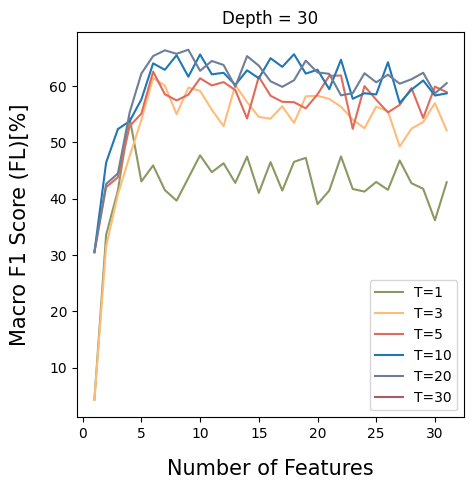

In [75]:
plot_line([model_analysis_n_3_D30_T1['no_feats'].to_list(), model_analysis_n_3_D30_T3['no_feats'].to_list(), model_analysis_n_3_D30_T5['no_feats'].to_list(), model_analysis_n_3_D30_T10['no_feats'].to_list(),  model_analysis_n_3_D30_T20['no_feats'].to_list(), model_analysis_n_3_D30_T30['no_feats'].to_list()], 
          [model_analysis_n_3_D30_T1['Macro_f1_FL'].to_list(), model_analysis_n_3_D30_T3['Macro_f1_FL'].to_list(), model_analysis_n_3_D30_T5['Macro_f1_FL'].to_list(), model_analysis_n_3_D30_T10['Macro_f1_FL'].to_list(), model_analysis_n_3_D30_T20['Macro_f1_FL'].to_list(), model_analysis_n_3_D30_T30['Macro_f1_FL'].to_list()],
          ['T=1', 'T=3', 'T=5', 'T=10', 'T=20', 'T=30'], 'Number of Features', 'Macro F1 Score (FL)[%]', 'Depth = 30')

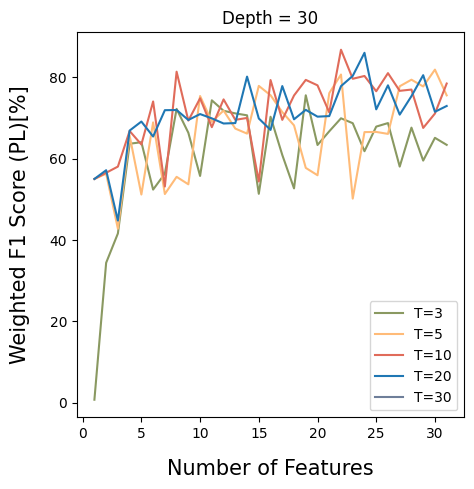

In [76]:
plot_line([model_analysis_n_3_D30_T3['no_feats'].to_list(), model_analysis_n_3_D30_T5['no_feats'].to_list(), model_analysis_n_3_D30_T10['no_feats'].to_list(),  model_analysis_n_3_D30_T20['no_feats'].to_list(), model_analysis_n_3_D30_T30['no_feats'].to_list()], 
          [model_analysis_n_3_D30_T3['Weighted_F1_PL'].to_list(), model_analysis_n_3_D30_T5['Weighted_F1_PL'].to_list(), model_analysis_n_3_D30_T10['Weighted_F1_PL'].to_list(), model_analysis_n_3_D30_T20['Weighted_F1_PL'].to_list(), model_analysis_n_3_D30_T30['Weighted_F1_PL'].to_list()],
          ['T=3', 'T=5', 'T=10', 'T=20', 'T=30'], 'Number of Features', 'Weighted F1 Score (PL)[%]', 'Depth = 30')

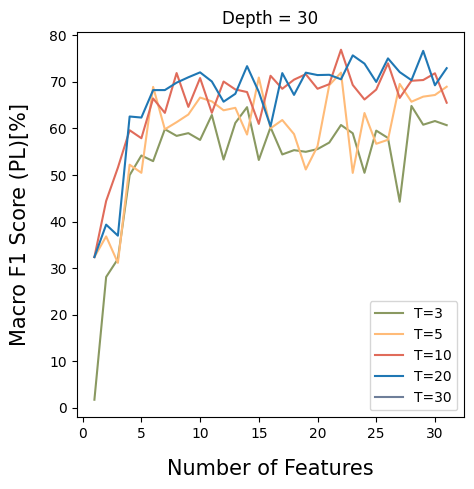

In [77]:
plot_line([model_analysis_n_3_D30_T3['no_feats'].to_list(), model_analysis_n_3_D30_T5['no_feats'].to_list(), model_analysis_n_3_D30_T10['no_feats'].to_list(),  model_analysis_n_3_D30_T20['no_feats'].to_list(), model_analysis_n_3_D30_T30['no_feats'].to_list()], 
          [model_analysis_n_3_D30_T3['Macro_F1_PL'].to_list(), model_analysis_n_3_D30_T5['Macro_F1_PL'].to_list(), model_analysis_n_3_D30_T10['Macro_F1_PL'].to_list(), model_analysis_n_3_D30_T20['Macro_F1_PL'].to_list(), model_analysis_n_3_D30_T30['Macro_F1_PL'].to_list()],
          ['T=3', 'T=5', 'T=10', 'T=20', 'T=30'], 'Number of Features', 'Macro F1 Score (PL)[%]', 'Depth = 30')

## TREE

#### Depth = 10

In [78]:
model_analysis_n_3_D10_F3 = model_analysis_n_3[(model_analysis_n_3['depth'] == 10) & (model_analysis_n_3['no_feats'] == 3)]
model_analysis_n_3_D10_F6 = model_analysis_n_3[(model_analysis_n_3['depth'] == 10) & (model_analysis_n_3['no_feats'] == 6)]
model_analysis_n_3_D10_F9 = model_analysis_n_3[(model_analysis_n_3['depth'] == 10) & (model_analysis_n_3['no_feats'] == 9)]
model_analysis_n_3_D10_F15 = model_analysis_n_3[(model_analysis_n_3['depth'] == 10) & (model_analysis_n_3['no_feats'] == 15)]
model_analysis_n_3_D10_F20 = model_analysis_n_3[(model_analysis_n_3['depth'] == 10) & (model_analysis_n_3['no_feats'] == 20)]

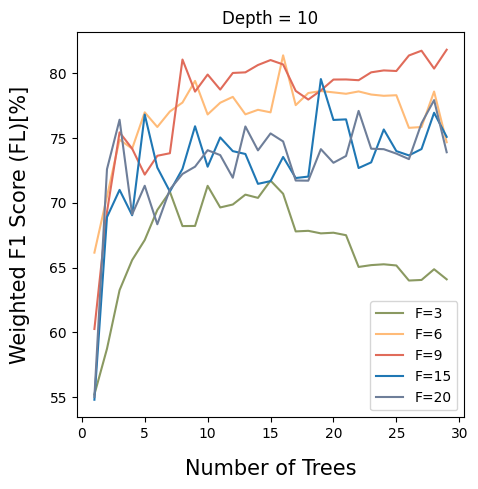

In [79]:
plot_line([model_analysis_n_3_D10_F3['tree'].to_list(), model_analysis_n_3_D10_F6['tree'].to_list(), model_analysis_n_3_D10_F9['tree'].to_list(), model_analysis_n_3_D10_F15['tree'].to_list(), model_analysis_n_3_D10_F20['tree'].to_list()], 
          [model_analysis_n_3_D10_F3['Weighted_f1_FL'].to_list(), model_analysis_n_3_D10_F6['Weighted_f1_FL'].to_list(), model_analysis_n_3_D10_F9['Weighted_f1_FL'].to_list(), model_analysis_n_3_D10_F15['Weighted_f1_FL'].to_list(), model_analysis_n_3_D10_F20['Weighted_f1_FL'].to_list()],
          ['F=3', 'F=6', 'F=9', 'F=15', 'F=20'], 'Number of Trees', 'Weighted F1 Score (FL)[%]', 'Depth = 10')

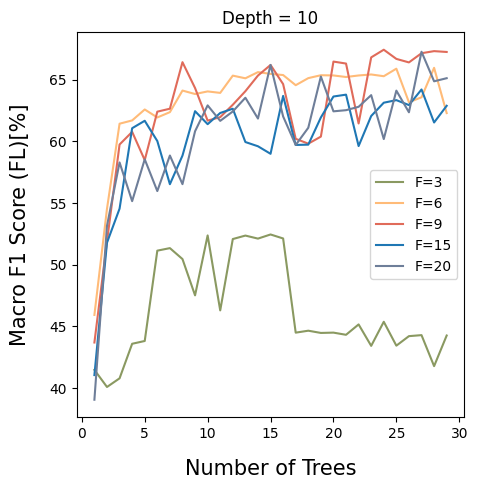

In [80]:
plot_line([model_analysis_n_3_D10_F3['tree'].to_list(), model_analysis_n_3_D10_F6['tree'].to_list(), model_analysis_n_3_D10_F9['tree'].to_list(), model_analysis_n_3_D10_F15['tree'].to_list(), model_analysis_n_3_D10_F20['tree'].to_list()], 
          [model_analysis_n_3_D10_F3['Macro_f1_FL'].to_list(), model_analysis_n_3_D10_F6['Macro_f1_FL'].to_list(), model_analysis_n_3_D10_F9['Macro_f1_FL'].to_list(), model_analysis_n_3_D10_F15['Macro_f1_FL'].to_list(), model_analysis_n_3_D10_F20['Macro_f1_FL'].to_list()],
          ['F=3', 'F=6', 'F=9', 'F=15', 'F=20'], 'Number of Trees', 'Macro F1 Score (FL)[%]', 'Depth = 10')

#### Depth = 20

In [81]:
model_analysis_n_3_D20_F3 = model_analysis_n_3[(model_analysis_n_3['depth'] == 20) & (model_analysis_n_3['no_feats'] == 3)]
model_analysis_n_3_D20_F7 = model_analysis_n_3[(model_analysis_n_3['depth'] == 20) & (model_analysis_n_3['no_feats'] == 7)]
model_analysis_n_3_D20_F9 = model_analysis_n_3[(model_analysis_n_3['depth'] == 20) & (model_analysis_n_3['no_feats'] == 9)]
model_analysis_n_3_D20_F15 = model_analysis_n_3[(model_analysis_n_3['depth'] == 20) & (model_analysis_n_3['no_feats'] == 15)]
model_analysis_n_3_D20_F20 = model_analysis_n_3[(model_analysis_n_3['depth'] == 20) & (model_analysis_n_3['no_feats'] == 20)]

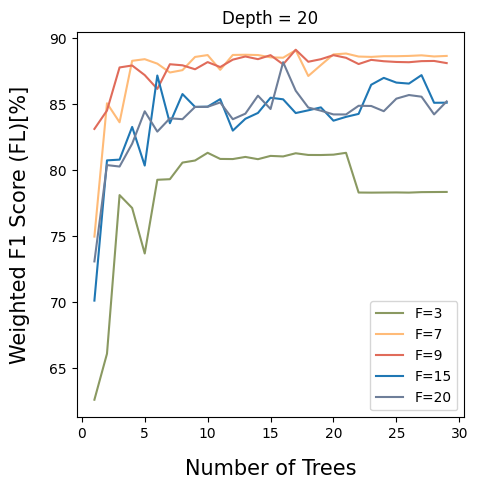

In [82]:
plot_line([model_analysis_n_3_D20_F3['tree'].to_list(), model_analysis_n_3_D20_F7['tree'].to_list(), model_analysis_n_3_D20_F9['tree'].to_list(), model_analysis_n_3_D20_F15['tree'].to_list(), model_analysis_n_3_D20_F20['tree'].to_list()], 
          [model_analysis_n_3_D20_F3['Weighted_f1_FL'].to_list(), model_analysis_n_3_D20_F7['Weighted_f1_FL'].to_list(), model_analysis_n_3_D20_F9['Weighted_f1_FL'].to_list(), model_analysis_n_3_D20_F15['Weighted_f1_FL'].to_list(), model_analysis_n_3_D20_F20['Weighted_f1_FL'].to_list()],
          ['F=3', 'F=7', 'F=9', 'F=15', 'F=20'], 'Number of Trees', 'Weighted F1 Score (FL)[%]', 'Depth = 20')

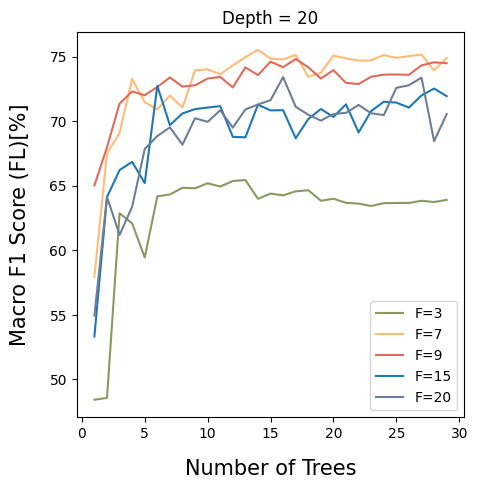

In [83]:
plot_line([model_analysis_n_3_D20_F3['tree'].to_list(), model_analysis_n_3_D20_F7['tree'].to_list(), model_analysis_n_3_D20_F9['tree'].to_list(), model_analysis_n_3_D20_F15['tree'].to_list(), model_analysis_n_3_D20_F20['tree'].to_list()], 
          [model_analysis_n_3_D20_F3['Macro_f1_FL'].to_list(), model_analysis_n_3_D20_F7['Macro_f1_FL'].to_list(), model_analysis_n_3_D20_F9['Macro_f1_FL'].to_list(), model_analysis_n_3_D20_F15['Macro_f1_FL'].to_list(), model_analysis_n_3_D20_F20['Macro_f1_FL'].to_list()],
          ['F=3', 'F=7', 'F=9', 'F=15', 'F=20'], 'Number of Trees', 'Macro F1 Score (FL)[%]', 'Depth = 20')

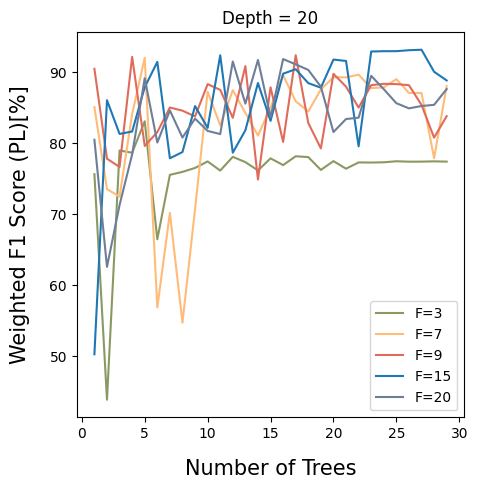

In [84]:
plot_line([model_analysis_n_3_D20_F3['tree'].to_list(), model_analysis_n_3_D20_F7['tree'].to_list(), model_analysis_n_3_D20_F9['tree'].to_list(), model_analysis_n_3_D20_F15['tree'].to_list(), model_analysis_n_3_D20_F20['tree'].to_list()], 
          [model_analysis_n_3_D20_F3['Weighted_F1_PL'].to_list(), model_analysis_n_3_D20_F7['Weighted_F1_PL'].to_list(), model_analysis_n_3_D20_F9['Weighted_F1_PL'].to_list(), model_analysis_n_3_D20_F15['Weighted_F1_PL'].to_list(), model_analysis_n_3_D20_F20['Weighted_F1_PL'].to_list()],
          ['F=3', 'F=7', 'F=9', 'F=15', 'F=20'], 'Number of Trees', 'Weighted F1 Score (PL)[%]', 'Depth = 20')

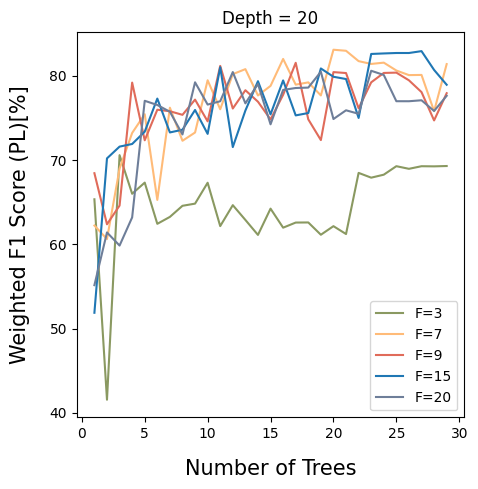

In [85]:
plot_line([model_analysis_n_3_D20_F3['tree'].to_list(), model_analysis_n_3_D20_F7['tree'].to_list(), model_analysis_n_3_D20_F9['tree'].to_list(), model_analysis_n_3_D20_F15['tree'].to_list(), model_analysis_n_3_D20_F20['tree'].to_list()], 
          [model_analysis_n_3_D20_F3['Macro_F1_PL'].to_list(), model_analysis_n_3_D20_F7['Macro_F1_PL'].to_list(), model_analysis_n_3_D20_F9['Macro_F1_PL'].to_list(), model_analysis_n_3_D20_F15['Macro_F1_PL'].to_list(), model_analysis_n_3_D20_F20['Macro_F1_PL'].to_list()],
          ['F=3', 'F=7', 'F=9', 'F=15', 'F=20'], 'Number of Trees', 'Weighted F1 Score (PL)[%]', 'Depth = 20')

#### Depth = 30

In [86]:
model_analysis_n_3_D30_F3 = model_analysis_n_3[(model_analysis_n_3['depth'] == 20) & (model_analysis_n_3['no_feats'] == 3)]
model_analysis_n_3_D30_F7 = model_analysis_n_3[(model_analysis_n_3['depth'] == 20) & (model_analysis_n_3['no_feats'] == 7)]
model_analysis_n_3_D30_F9 = model_analysis_n_3[(model_analysis_n_3['depth'] == 20) & (model_analysis_n_3['no_feats'] == 9)]
model_analysis_n_3_D30_F15 = model_analysis_n_3[(model_analysis_n_3['depth'] == 20) & (model_analysis_n_3['no_feats'] == 15)]
model_analysis_n_3_D30_F20 = model_analysis_n_3[(model_analysis_n_3['depth'] == 20) & (model_analysis_n_3['no_feats'] == 20)]

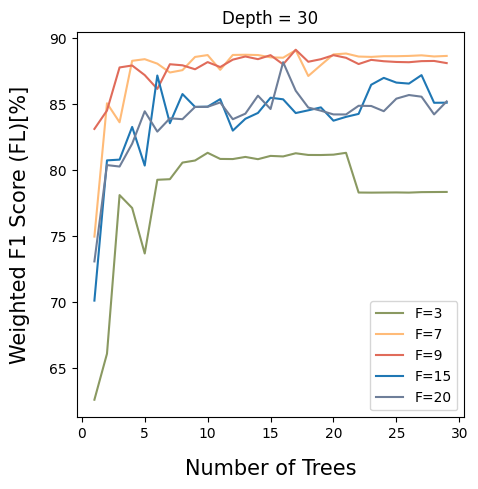

In [87]:
plot_line([model_analysis_n_3_D30_F3['tree'].to_list(), model_analysis_n_3_D30_F7['tree'].to_list(), model_analysis_n_3_D30_F9['tree'].to_list(), model_analysis_n_3_D30_F15['tree'].to_list(), model_analysis_n_3_D30_F20['tree'].to_list()], 
          [model_analysis_n_3_D30_F3['Weighted_f1_FL'].to_list(), model_analysis_n_3_D30_F7['Weighted_f1_FL'].to_list(), model_analysis_n_3_D30_F9['Weighted_f1_FL'].to_list(), model_analysis_n_3_D30_F15['Weighted_f1_FL'].to_list(), model_analysis_n_3_D30_F20['Weighted_f1_FL'].to_list()],
          ['F=3', 'F=7', 'F=9', 'F=15', 'F=20'], 'Number of Trees', 'Weighted F1 Score (FL)[%]', 'Depth = 30')

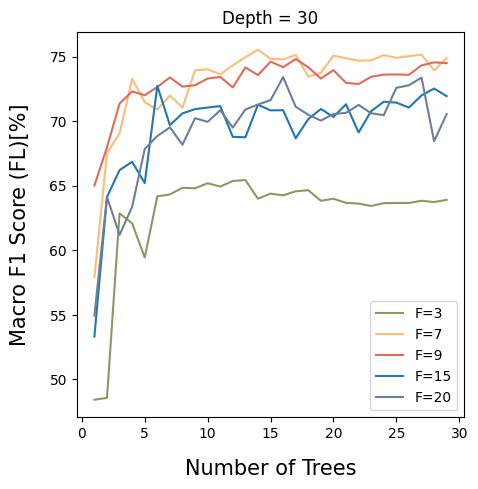

In [88]:
plot_line([model_analysis_n_3_D30_F3['tree'].to_list(), model_analysis_n_3_D30_F7['tree'].to_list(), model_analysis_n_3_D30_F9['tree'].to_list(), model_analysis_n_3_D30_F15['tree'].to_list(), model_analysis_n_3_D30_F20['tree'].to_list()], 
          [model_analysis_n_3_D30_F3['Macro_f1_FL'].to_list(), model_analysis_n_3_D30_F7['Macro_f1_FL'].to_list(), model_analysis_n_3_D30_F9['Macro_f1_FL'].to_list(), model_analysis_n_3_D30_F15['Macro_f1_FL'].to_list(), model_analysis_n_3_D30_F20['Macro_f1_FL'].to_list()],
          ['F=3', 'F=7', 'F=9', 'F=15', 'F=20'], 'Number of Trees', 'Macro F1 Score (FL)[%]', 'Depth = 30')

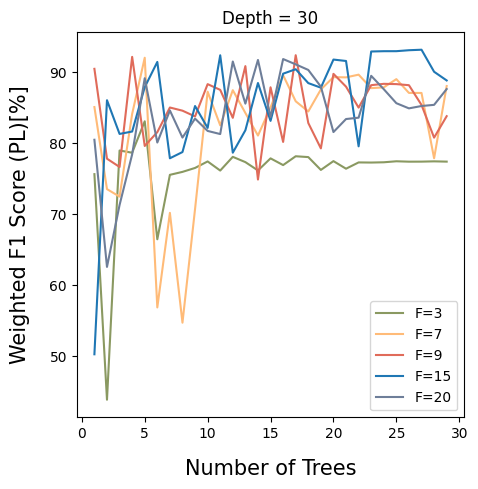

In [91]:
plot_line([model_analysis_n_3_D30_F3['tree'].to_list(), model_analysis_n_3_D30_F7['tree'].to_list(), model_analysis_n_3_D30_F9['tree'].to_list(), model_analysis_n_3_D30_F15['tree'].to_list(), model_analysis_n_3_D30_F20['tree'].to_list()], 
          [model_analysis_n_3_D30_F3['Weighted_F1_PL'].to_list(), model_analysis_n_3_D30_F7['Weighted_F1_PL'].to_list(), model_analysis_n_3_D30_F9['Weighted_F1_PL'].to_list(), model_analysis_n_3_D30_F15['Weighted_F1_PL'].to_list(), model_analysis_n_3_D30_F20['Weighted_F1_PL'].to_list()],
          ['F=3', 'F=7', 'F=9', 'F=15', 'F=20'], 'Number of Trees', 'Weighted F1 Score (PL)[%]', 'Depth = 30')

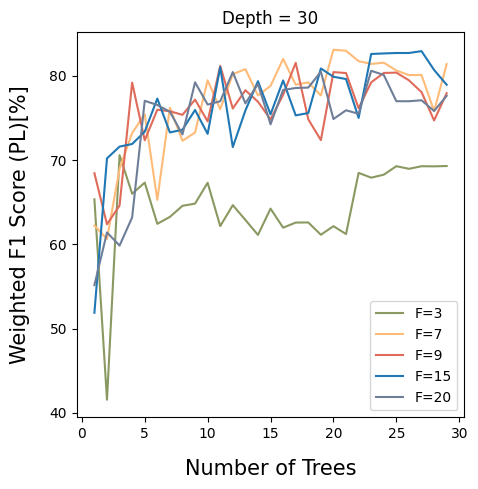

In [92]:
plot_line([model_analysis_n_3_D30_F3['tree'].to_list(), model_analysis_n_3_D30_F7['tree'].to_list(), model_analysis_n_3_D30_F9['tree'].to_list(), model_analysis_n_3_D30_F15['tree'].to_list(), model_analysis_n_3_D30_F20['tree'].to_list()], 
          [model_analysis_n_3_D30_F3['Macro_F1_PL'].to_list(), model_analysis_n_3_D30_F7['Macro_F1_PL'].to_list(), model_analysis_n_3_D30_F9['Macro_F1_PL'].to_list(), model_analysis_n_3_D30_F15['Macro_F1_PL'].to_list(), model_analysis_n_3_D30_F20['Macro_F1_PL'].to_list()],
          ['F=3', 'F=7', 'F=9', 'F=15', 'F=20'], 'Number of Trees', 'Weighted F1 Score (PL)[%]', 'Depth = 30')

## DEPTH

In [93]:
model_analysis_n_3_F8_T3    = model_analysis_n_3[(model_analysis_n_3['no_feats'] == 9) & (model_analysis_n_3['tree'] == 3)]
model_analysis_n_3_F8_T5    = model_analysis_n_3[(model_analysis_n_3['no_feats'] == 9) & (model_analysis_n_3['tree'] == 5)]
model_analysis_n_3_F8_T7    = model_analysis_n_3[(model_analysis_n_3['no_feats'] == 9) & (model_analysis_n_3['tree'] == 7)]
model_analysis_n_3_F8_T12   = model_analysis_n_3[(model_analysis_n_3['no_feats'] == 9) & (model_analysis_n_3['tree'] == 12)]
model_analysis_n_3_F8_T20   = model_analysis_n_3[(model_analysis_n_3['no_feats'] == 9) & (model_analysis_n_3['tree'] == 20)]

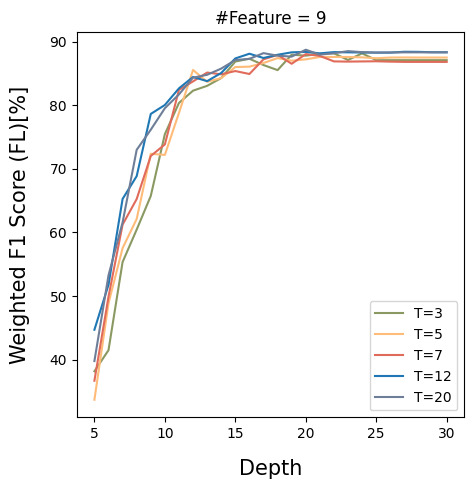

In [94]:
plot_line([model_analysis_n_3_F8_T3['depth'].to_list(), model_analysis_n_3_F8_T5['depth'].to_list(), model_analysis_n_3_F8_T7['depth'].to_list(), model_analysis_n_3_F8_T12['depth'].to_list(), model_analysis_n_3_F8_T20['depth'].to_list()], 
          [model_analysis_n_3_F8_T3['Weighted_f1_FL'].to_list(), model_analysis_n_3_F8_T5['Weighted_f1_FL'].to_list(), model_analysis_n_3_F8_T7['Weighted_f1_FL'].to_list(), model_analysis_n_3_F8_T12['Weighted_f1_FL'].to_list(), model_analysis_n_3_F8_T20['Weighted_f1_FL'].to_list()],
          ['T=3', 'T=5', 'T=7', 'T=12', 'T=20'], 'Depth', 'Weighted F1 Score (FL)[%]', '#Feature = 9')

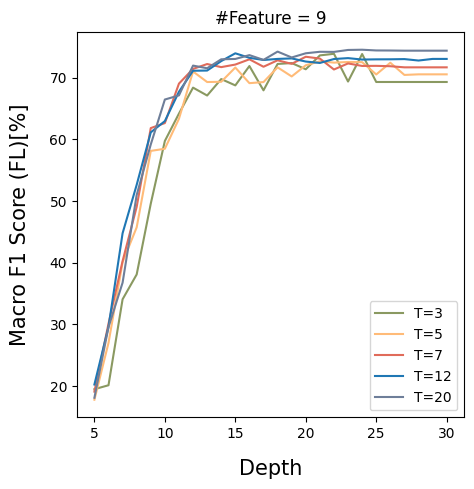

In [95]:
plot_line([model_analysis_n_3_F8_T3['depth'].to_list(), model_analysis_n_3_F8_T5['depth'].to_list(), model_analysis_n_3_F8_T7['depth'].to_list(), model_analysis_n_3_F8_T12['depth'].to_list(), model_analysis_n_3_F8_T20['depth'].to_list()], 
          [model_analysis_n_3_F8_T3['Macro_f1_FL'].to_list(), model_analysis_n_3_F8_T5['Macro_f1_FL'].to_list(), model_analysis_n_3_F8_T7['Macro_f1_FL'].to_list(), model_analysis_n_3_F8_T12['Macro_f1_FL'].to_list(), model_analysis_n_3_F8_T20['Macro_f1_FL'].to_list()],
          ['T=3', 'T=5', 'T=7', 'T=12', 'T=20'], 'Depth', 'Macro F1 Score (FL)[%]', '#Feature = 9')